# Дискретные случайные процессы и временные ряды, DS-поток
## Задание TS.1
### Временные ряды. Прогнозирование временного ряда с помощью сведения к задаче регрессии.

**Правила:**

* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds24_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания получат штраф.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* В каждой задаче не забывайте делать **пояснения и выводы**.
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.


**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание:**

* Задача 1 &mdash; 100 баллов
* Задача 2 &mdash; 120 баллов

**Важность задач:**

* *высокая:* задача 1;
* *средняя:* задача 2.

In [ ]:
# Bot check

# HW_ID: ds_ts1
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [31]:
import pandas as pd
import numpy as np
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import RandomizedSearchCV, TimeSeriesSplit
from sklearn.linear_model import LinearRegression
from catboost import CatBoostRegressor
from sklearn.multioutput import RegressorChain

___
### Задача 1
В данной задаче вы будете работать с данными о погоде. Архив с данными следует скачать по [ссылке](https://disk.yandex.ru/d/Teb7CiyVa9EmEA). Датасет содержит данные погоды примерно за 5 лет для городов США, Канады и Израиля. Данные разбиты на несколько файлов:
* `city_attributes.csv` &mdash; для каждого города указана страна и его координаты;
* `humidity.csv` &mdash; относительная влажность;
* `preassure.csv` &mdash; давление;
* `temperature.csv` &mdash; температура в градусах Кельвина;
* `weather_description.csv` &mdash; текстовое описание погоды;
* `wind_direction.csv` &mdash; направление ветра в градусах;
* `wind_speed.csv` &mdash; скорость ветра м/с.

В этой задаче вы проведете первичный анализ данных и сделаете несколько визуализаций.

__1.__ Средние температура и влажность.\
Посмотрим на данные в целом. Рассмотрим такие показатели как температура и влажность.

* Посчитайте среднюю температуру и влажность для каждого города за каждый месяц. Всего должно получиться 12 месяцев. 
* Полученные данные объедините с данными о городах (например, с помощью функции `pandas.DataFrame.merge`) в новую таблицу. 
* Новую таблицу используйте для отображения графика. Для визуализации используйте `plotly.express.scatter_mapbox`, про функцию можно посмотреть в [документации](https://plotly.github.io/plotly.py-docs/generated/plotly.express.scatter_mapbox.html) или в [примерах](https://plotly.com/python/scattermapbox/).  Итоговый график должен представлять из себя карту, где в каждая точка соответствует городу. Цвет точки соответствует средней температуре, размер точки &mdash; влажности. Кроме того установите параметр `animation_frame` равным месяцу в году. В итоге график должен отображать среднюю температуру и влажность за каждый месяц, а скроллинг должен отображать картинку для каждого месяца в году.
* Сделайте выводы о погоде на основе полученного графика. Чем больше ключевых моментов в выводе, тем лучше.

In [32]:
df = pd.read_csv('weather_ts/city_attributes.csv').drop('Country', axis=1)  # города

for k in ['temperature','humidity']:  # получим среднюю темп.\влажн. по городам и месяцам
    feature = pd.read_csv(f'weather_ts/{k}.csv')
    feature['month'] = pd.to_datetime(feature['datetime']).dt.month
    avg = feature.drop('datetime', axis=1).groupby('month').mean().T.reset_index().rename(columns={'index':'City'}) 
    avg = pd.melt(avg, id_vars=['City'], value_vars=list(range(1,13)), var_name='Month', value_name=k).round(2)  # для удобства анимаций
    df = df.merge(avg)
df = df.rename(columns={'Month':'Месяц','temperature':'Температура','humidity':'Влажность'}) 

df.head(3)

,City,Latitude,Longitude,Месяц,Температура,Влажность
0,Vancouver,49.24966,-123.119339,1,276.59,89.14
1,Vancouver,49.24966,-123.119339,2,277.94,86.33
2,Vancouver,49.24966,-123.119339,3,280.16,83.56


In [33]:
fig = px.scatter_map(df, lat="Latitude", lon="Longitude", color="Температура", size="Влажность", animation_frame='Месяц', zoom=1.5, 
  hover_name='City', hover_data={'Latitude':False,'Longitude':False,'Месяц':False,'Температура':True,'Влажность':True},
  range_color=[df['Температура'].min(), df['Температура'].max()], title='Температура и влажность по городам и месяцам')
# fig.show()
fig.write_html('1.1.html')

***График прикрепил отдельным файлом 1.1.html***

*Вспомнив школьную географию, выделим несколько эффектов, влияющих на климат. Эффекты могут друг другу противоречить локально, но характеризуют верные глобальные закономерности:*  
*1) летом - теплее, зимой - холоднее, что типично для сезонов северного полушария*  
*2) чем ближе к экватору (южнее), тем выше температура*  
*3) чем дальше от побережья вглубь материка, тем более континентален климат. А именно: снижается влажность, увеличивается годовой перепад температур (зимой - еще холоднее, летом - еще жарче). Типичные исключения: города, расположенные близко к океану, но отделенные от него горным хребтом (Las Vegas, Phoenix)*  
*4) для Сев. Америки: чем ближе к восточному побережью, тем более мягок климат (выше влажность, меньше амплитуда температур). Это объясняется теплым течением Гольфстрим, повышающим испаряемость океанических вод*  

__2.__ Пропуски в данных.\
Хотя данные представлены довольно регулярно, они содержат немало пропусков. 
* Посчитайте пропуски для каждого из городов и для каждого из показателей погоды.

* Выберите город с наименьшим количеством пропусков. Назовем этот город X.

* Если данные имеют пропуски в начале или в конце, то лучше обрезать данные. Остальные пропуски стоит заполнить предыдущим значением по дате. Для этого вам может помочь функция `pandas.DataFrame.fillna`.

*Посчитаем сначала суммарное число пропусков по городам и выберем город Х с наиболее тщательными измерениями*

In [34]:
keys = ['humidity','pressure','temperature','weather_description','wind_direction','wind_speed']  # соберем всё вместе
data = pd.concat([pd.read_csv(f'weather_ts/{k}.csv').drop('datetime', axis=1) for k in keys], axis=0).isna().sum().sort_values()
print(f'Х = {data.index[0]} ({data.values[0]} пропусков)')

Х = Houston (139 пропусков)


*Обработаем пропуски*

In [35]:
houston = pd.DataFrame({k:pd.read_csv(f'weather_ts/{k}.csv', usecols=['Houston']).values.T[0] for k in keys})
houston['datetime'] = pd.to_datetime(pd.read_csv(f'weather_ts/humidity.csv', usecols=['datetime']).values.T[0])

display(houston.head(2))  # в начале пропуски лишь в 1й строке, обрежем
houston.drop(0, inplace=True)
display(houston.tail(2))  # в конце пропусков нет
houston.ffill(inplace=True)  # остальные пропуски заполним "по инерции" (был ворнинг, что df.fillna deprecated)
assert houston.isna().sum().sum() == 0

,humidity,pressure,temperature,weather_description,wind_direction,wind_speed,datetime
0,NaN,NaN,NaN,NaN,NaN,NaN,2012-10-01 12:00:00
1,93.0,1009.0,288.27,sky is clear,270.0,1.0,2012-10-01 13:00:00


,humidity,pressure,temperature,weather_description,wind_direction,wind_speed,datetime
45251,49.0,1020.0,294.65,haze,290.0,2.0,2017-11-29 23:00:00
45252,52.0,1020.0,291.44,haze,326.0,2.0,2017-11-30 00:00:00


__3.__ Визуализация данных для города X
* Отобразите значения всех числовых (температура, влажность, скорость ветра ...) для города X. Постройте **аккуратные** графики с помощью `plotly`. 

* Сделайте выводы о погоде для данного города.

In [36]:
num_keys = ['humidity','pressure','temperature','wind_direction','wind_speed']  # всё, кроме weather_description
translate = {'humidity':'Влажность','pressure':'Давление','temperature':'Температура','wind_direction':'Направление ветра','wind_speed':'Скорость ветра'}
fig = make_subplots(rows=len(num_keys), cols=1)
for i,k in enumerate(num_keys):
    fig.add_trace(go.Scatter(x=houston['datetime'], y=houston[k], name=translate[k]), row=i+1, col=1)
fig.update_layout(title_text="Погода в Хьюстоне", height=800)  #, width=800)
# fig.show()
fig.write_html('1.3.html')

***График прикрепил отдельным файлом 1.3.html***

*Мне показалось интересным дополнительно нарисовать розу ветров (правда по ней ничего нового узнать не получилось)*

In [37]:
houston['Месяц'] = houston['datetime'].dt.month
houston['wind_direction'] = houston['wind_direction'] // 10 * 10
wind = houston.groupby(['Месяц','wind_direction'])['wind_speed'].mean().reset_index()
houston.drop('Месяц', axis=1, inplace=True)
fig = px.bar_polar(wind, r='wind_speed', theta='wind_direction', title='Роза ветров в Хьюстоне', animation_frame='Месяц')
fig.update_layout(polar=dict(radialaxis=dict(range=[wind.wind_speed.min(),wind.wind_speed.max()])))
# fig.show()
fig.write_html('1.3.wind.html')

***График прикрепил отдельным файлом 1.3.wind.html***

*Судя по данным, климат в Хьюстоне довольно теплый и влажный, с выраженными временами года (судя по сезонности на графике температуры).*

__4.__ Для города X будем предсказывать температуру с помощью моделей машинного обучения.
* Разбейте данные на обучение и тест. Для тестовой выборки используйте последнюю неделю из данных.

* Выберите одну из линейных моделей и какую-либо из моделей градиентного бустинга. Поясните свой выбор.

* Подготовьте данные для обучения и теста. Обратите внимание на то, что в зависимости от выбранной модели, вам может пригодиться разная обработка категориальных признаков.

* Выберите стратегию предсказания на несколько шагов вперед.

* Постройте и обучите выбранные модели. Попробуйте найти оптимальные значения гиперпараметров, используя процедуру кросс-валидации для временных рядов. Для этого вам могут быть полезны функции [`sklearn.model_selection.RandomizedSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html) и [`sklearn.model_selection.TimeSeriesSplit`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html). В качестве метрики качества используйте MAPE.

* Выберите лучшую модель и посчитайте качество на тесте. Визуализируйте результат.

* Сделайте выводы.

*Сгенерируем признаки из даты (причем работаем с природными явлениями, так что дни недели\выходные\праздники никак не влияют). Уберем weather_description. Произведем сплит*  

In [38]:
houston['year'], houston['month'], houston['day'], houston['hour'] = \
  houston['datetime'].dt.year, houston['datetime'].dt.month, houston['datetime'].dt.day, houston['datetime'].dt.hour

# desc = houston['weather_description'].value_counts()
# rare = set(desc[desc < 100].index)
# houston['weather_description'] = houston['weather_description'].apply(lambda x: 'other' if x in rare else x)
houston.drop('weather_description', axis=1, inplace=True)

sep = houston['datetime'].max() - pd.Timedelta(days=7)  # отщепим для теста последние 7 дней
train_dt, test_dt = houston[houston['datetime'] < sep]['datetime'], houston[houston['datetime'] >= sep]['datetime']
train, test = houston[houston['datetime'] < sep].drop('datetime', axis=1), houston[houston['datetime'] >= sep].drop('datetime', axis=1)
X_train, y_train, X_test, y_test = train.drop('temperature', axis=1), train['temperature'], test.drop('temperature', axis=1), test['temperature']
X_train.head(3)

,humidity,pressure,wind_direction,wind_speed,year,month,day,hour
1,93.0,1009.0,270.0,1.0,2012,10,1,13
2,92.0,1008.0,260.0,1.0,2012,10,1,14
3,90.0,1008.0,260.0,1.0,2012,10,1,15


*Попробуем обучить линейную регрессию и CatBoostRegressor. Catboost умеет обрабатывать категориальные фичи, что может пригодиться.*  
*Предсказание на несколько шагов вперед будем проводить рекурсивно. Конечно, этот метод накапливает погрешность, но климат - это хаотическая система с огромным количестом источников погрешности, вносящих куда больший вклад. Кроме того, рекурсивная стратегия сэкономит время и ресурсы, т.к. не придется обучать много моделей. В общем, в этой задаче погрешность накопилась бы в любом случае, как бы мы ни старались, поэтому просто выбираем самый простой и экономичный метод прогноза.*  
*Поскольку в задаче требуется построить бейзлайн (без лагов), то рекурсивная стратегия реализуется совсем просто (с опорой лишь на текущий элемент)*

In [39]:
random_grid = {
    "depth": [4, 6, 8, 10],
    "learning_rate": [0.05, 0.1],
    "n_estimators": [200, 400, 600, 800, 1000, 1200],
}
cv = [
    [np.arange(0, 365), np.arange(365, 365 * 2)],
    [np.arange(0, 365 * 2), np.arange(365 * 2, 365 * 3)],
]
ctb = CatBoostRegressor(verbose=False)
ctb_random = RandomizedSearchCV(
    estimator=ctb,
    param_distributions=random_grid,
    n_iter=32,
    cv=cv,
    scoring="neg_mean_absolute_percentage_error",
    random_state=42,
    n_jobs=4,
    verbose=False,
)
ctb_random.fit(X_train, y_train)
ctb_random.best_params_

{'n_estimators': 200, 'learning_rate': 0.05, 'depth': 4}

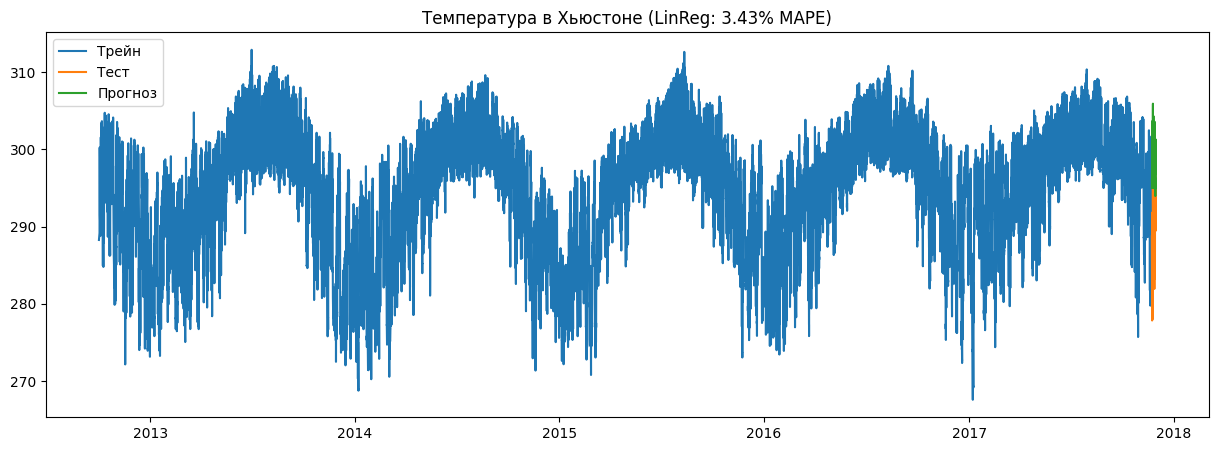

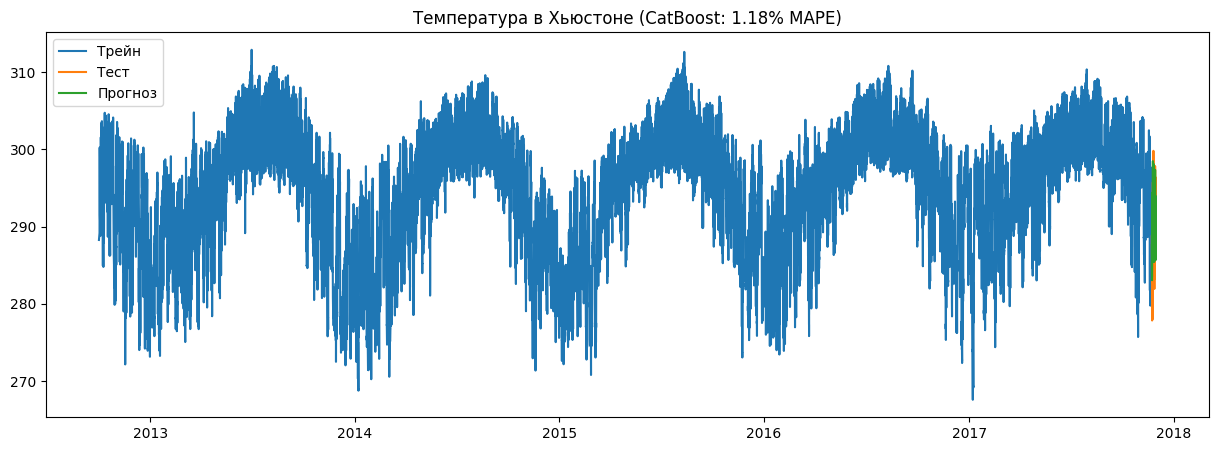

In [40]:
def plot_results(y_to_train, y_to_test, y_forecast, name):
    """Визуализации временного ряда и предсказания"""
    plt.figure(figsize=(15, 5))
    err = round(mean_absolute_percentage_error(y_true=y_to_test, y_pred=y_forecast) * 100, 2)
    plt.title(f"Температура в Хьюстоне ({name}: {err}% MAPE)")
    plt.plot(train_dt, y_to_train, label="Трейн")
    plt.plot(test_dt, y_to_test, label="Тест")
    plt.plot(test_dt, y_forecast, label="Прогноз")
    plt.legend()
    plt.show()

for model,name in zip([LinearRegression,CatBoostRegressor], ['LinReg','CatBoost']):
    m = model(verbose=False, **ctb_random.best_params_) if name == 'CatBoost' else model()
    m.fit(X_train, y_train)
    pred = m.predict(X_test)
    plot_results(y_train, y_test, pred, name)

***Вывод:** в этой задаче удалось поработать с задачей прогноза временного ряда, а именно - подробно изучить данные и построить пару простых моделей. CatBoost справился чуть лучше, чем лин.регрессия*

___
### Задача 2 

Скачайте данные о дневном спросе разных товаров в разных магазинах: https://www.kaggle.com/c/demand-forecasting-kernels-only

__1.__ Поделите train-датасет на обучающий и тестовый: последние 365 дней &mdash; в тест, все остальное &mdash; в обучение.

In [41]:
df = pd.read_csv('demand-forecasting-kernels-only/train.csv')
df = df[df.item == 1].drop('item', axis=1)  # сразу оставим только 1й айтем
df['date'] = pd.to_datetime(df['date'])
sep = df['date'].max() - pd.Timedelta(days=365)
train, test = df[df['date'] < sep], df[df['date'] >= sep]
train.head(3)

,date,store,sales
0,2013-01-01,1,13
1,2013-01-02,1,11
2,2013-01-03,1,14


__2.__ Придумайте и обучите модель для предсказания спроса на товар номер 1 в первом магазине, которая будет обходить по метрикам MSE, MAE, MAPE лучшее решение, полученное на занятии. В решении должно быть использовано **хотя бы 3 пункта** из перечисленного.
* Использовать данные о продажах товара в других магазинах в качестве дополнительных признаков для ML-моделей. Придумать больше признаков для ML-моделей. Можно использовать `tsfresh`.
* Подобрать оптимальные гиперпараметры для ML-моделей, используя кросс-валидацию на временных рядах. Обратите внимание на [`TimeSeriesSplit`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html).
* Реализовать другую стратегию прогнозирования: **прямую** или **гибридную**. 
    * При реализации прямой/гибридной стратегий можете использовать не бустинги, а линейные модели, например, чтобы сократить время обучения 365 моделей. 
    * При реализации гибридной стратегии можете использовать [`sklearn.multioutput.RegressorChain`](https://scikit-learn.org/stable/modules/generated/sklearn.multioutput.RegressorChain.html).
* Придумать совершенно любое другое разумное улучшение, которое побьет решение с занятия.

In [42]:
store1 = df[df.store == 1].copy().drop('store', axis=1)
store1['sales_in_other_stores'] = df[df.store!=1].groupby('date').mean()['sales'].values
store1['year'] = store1['date'].dt.year
store1['month'] = store1['date'].dt.month
store1['day'] = store1['date'].dt.day
store1['dayofweek'] = store1['date'].dt.dayofweek
store1['is_weekend'] = store1['dayofweek'] > 4  # 5-сб, 6-вс
store1['sales_1d'] = store1.shift(1)['sales']
store1['sales_1w'] = store1.shift(7)['sales']
store1['sales_1m'] = store1.shift(30)['sales']
store1['sales_1y'] = store1.shift(365)['sales']
store1.dropna(how='any', inplace=True)

store1.head(3)

,date,sales,sales_in_other_stores,year,month,day,dayofweek,is_weekend,sales_1d,sales_1w,sales_1m,sales_1y
365,2014-01-01,9,11.111111,2014,1,1,2,False,15.0,6.0,8.0,13.0
366,2014-01-02,14,12.666667,2014,1,2,3,False,9.0,16.0,21.0,11.0
367,2014-01-03,11,15.000000,2014,1,3,4,False,14.0,18.0,6.0,14.0


In [43]:
sep = store1['date'].max() - pd.Timedelta(days=365)
train, test = store1[store1['date'] < sep], store1[store1['date'] >= sep]
X_train, X_test, y_train, y_test = train.drop(['sales','date'], axis=1), test.drop(['sales','date'], axis=1), train[['sales']], test[['sales']]

X_train.head(3)

,sales_in_other_stores,year,month,day,dayofweek,is_weekend,sales_1d,sales_1w,sales_1m,sales_1y
365,11.111111,2014,1,1,2,False,15.0,6.0,8.0,13.0
366,12.666667,2014,1,2,3,False,9.0,16.0,21.0,11.0
367,15.000000,2014,1,3,4,False,14.0,18.0,6.0,14.0


In [44]:
model = RegressorChain(base_estimator=CatBoostRegressor(verbose=False))
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mean_absolute_percentage_error(y_pred, y_test)

0.19273911660165033

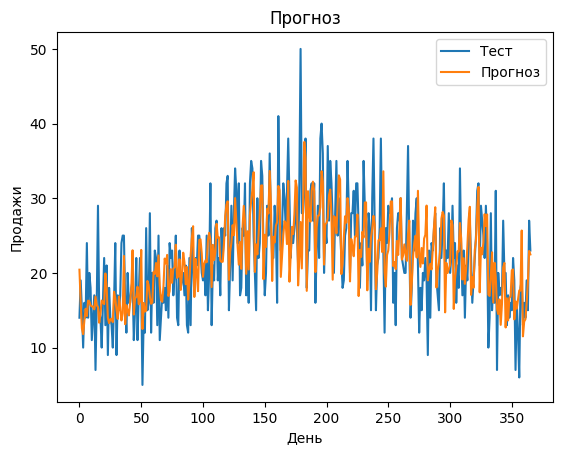

In [ ]:
plt.plot(np.arange(len(y_test)), y_test, label='Тест')
plt.plot(np.arange(len(y_test)), y_pred, label='Прогноз')
plt.xlabel('День')
plt.ylabel('Продажи')
plt.title('Прогноз')
plt.legend()
plt.show()

*Как видно, модель неплохо справляется с задачей*

__3.__ Реализуйте модели, которые будут предсказывать спрос на товары во всех магазинах на тестовой части датасета. Получите значение метрик MSE, MAE, MAPE для всех предсказаний. При этом моделей должно быть меньше, чем количество различных пар "номер магазина, номер товара" в датасете, но больше одной модели.

In [ ]:
df = pd.read_csv('demand-forecasting-kernels-only/train.csv')
df['date'] = pd.to_datetime(df['date'])

df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['dayofweek'] = df['date'].dt.dayofweek
df['is_weekend'] = df['dayofweek'] > 4  # 5-сб, 6-вс
df['sales_1d'] = df.shift(1)['sales']
df['sales_1w'] = df.shift(7)['sales']
df['sales_1m'] = df.shift(30)['sales']
df['sales_1y'] = df.shift(365)['sales']  # шифт не по дням, а по строкам, т.е. мешают другие айтемы и магазины(
df.dropna(how='any', inplace=True)

sep = df['date'].max() - pd.Timedelta(days=365)
train, test = df[df['date'] < sep], df[df['date'] >= sep]

SyntaxError: invalid syntax (3000440494.py, line 1)